In [1]:
import numpy as np
from numpy import linalg as LA
import warnings
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# МНК


$$
f(x) \approx \sum_{n=0}^{N} c_n ((x - 1955)/45)^n
$$

$$
\phi (x, a_1, ... , a_m) = \sum_{i=1}^{m} a_i\cdot \phi_i(x)
$$

$$
\sum_{j = 1}^{n}(\phi_i, \phi_j)a_j = (\phi_i, y)
$$

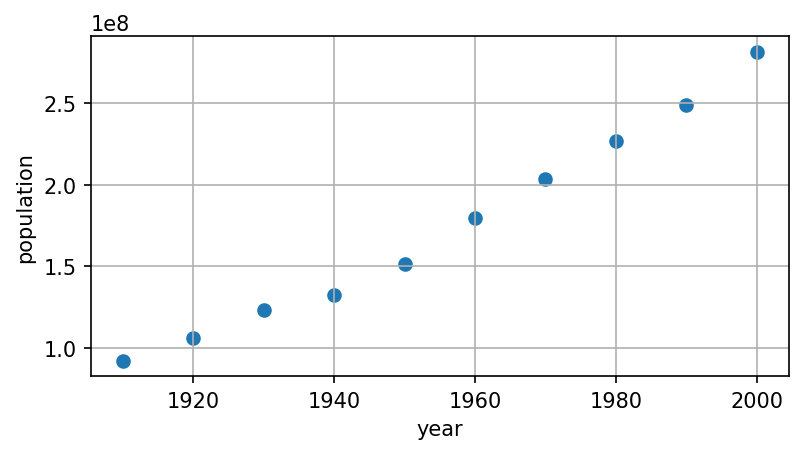

In [4]:
year  = np.arange(1910, 2010, 10)
population = [
    92228496, 
    106021537, 
    123202624, 
    132164569, 
    151325798, 
    179323175, 
    203211926, 
    226545805, 
    248709873, 
    281421906
]
population = np.array(population)

fig= plt.figure(figsize=(6, 3), dpi=150)
plt.scatter(year, population)
plt.xlabel("year")
plt.ylabel("population")
plt.grid()

In [5]:
n_points = len(year)
phi = []
max_degree = 5

def phi_n(n, p, step):
    phi = []
    x = (np.arange(1910, 1910+step*p, step)-1955)/45
    phi.append(np.ones(p))
    for i in range(1, n):
        phi.append(np.power(x, i))
    return phi

phi = phi_n(max_degree+1, n_points, 10)

A = np.zeros((max_degree+1, max_degree+1))

for i in range(max_degree+1):
    for j in range(max_degree+1):
        A[i][j] = np.sum(phi[i]*phi[j])


year0 = np.linspace(1910, 2020, 100)
x0 = (year0-1955)/45
x = (np.arange(1910, 2010, 10)-1955)/45

f = [np.sum(phi[i]*population) for i in range(len(phi))]
c = LA.solve(A, f)


f5 = np.poly1d(c[::-1])
p5 = lambda year: f5((year-1955)/45)

f4 = np.poly1d(c[max_degree-1::-1])
p4 = lambda year: f4((year-1955)/45)

f3 = np.poly1d(c[max_degree-2::-1])
p3 = lambda year: f3((year-1955)/45)

f2 = np.poly1d(c[max_degree-3::-1])
p2 = lambda year: f2((year-1955)/45)

f1 = np.poly1d(c[max_degree-4::-1])
p1 = lambda year: f1((year-1955)/45)

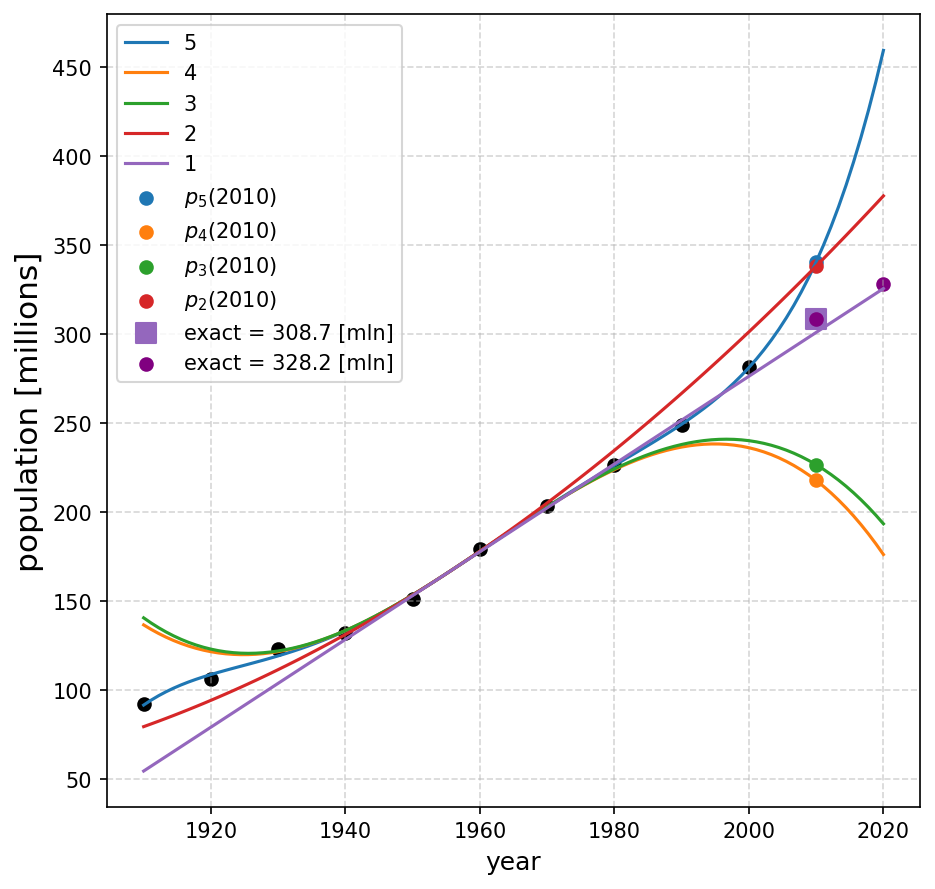

In [6]:
fig= plt.figure(figsize=(7, 7), dpi=150)

plt.scatter(year, population/1e6, color = 'k')

plt.plot(year0, p5(year0)/1e6, label = '5')
plt.plot(year0, p4(year0)/1e6, label = '4')
plt.plot(year0, p3(year0)/1e6, label = '3')
plt.plot(year0, p2(year0)/1e6, label = '2')
plt.plot(year0, p1(year0)/1e6, label = '1')

plt.scatter(2010, p5(2010)/1e6, label = '$p_5(2010)$')
plt.scatter(2010, p4(2010)/1e6, label = '$p_4(2010)$')
plt.scatter(2010, p3(2010)/1e6, label = '$p_3(2010)$')
plt.scatter(2010, p2(2010)/1e6, label = '$p_2(2010)$')
plt.scatter(2010, 308.745538, marker = 's', s = 100, label = 'exact = 308.7 [mln]')
plt.scatter(2020, 328.2, color = 'purple', label = 'exact = 328.2 [mln]')
plt.scatter(2010, 308.745538, color = 'purple')

plt.grid(alpha=0.5, linestyle="--")
plt.xlabel("year", fontsize = 12)
plt.ylabel("population [millions]", fontsize = 15)

plt.legend(fontsize = 10)

plt.show()